In [18]:
import gmaps
import numpy as np
import pandas as pd
import os
import scipy.stats as st

# # Google developer API key
# from config import gkey

# # Configure gmaps
# gmaps.configure(api_key=gkey)

#This is the general/common section
path = pd.read_csv('../01._Prospective_Project_Data/1._72199_158097_compressed_indeed_job_dataset.csv/indeed_job_dataset_V3_CSV.csv')
df = pd.DataFrame(path)
df

df.fillna(0) 
df

,Index_No,Job_Title,Link,Queried_Salary,Salary_Index,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
0,0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,1,data_scientist,"['SAP', 'SQL']",2.0,Express Scripts,3301.0,...,0,0,0,1,0,0,0,1,0,0
1,1,Data Scientist,https://www.indeed.com/rc/clk?jk=86afd561ea8c6...,<80000,1,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",5.0,Money Mart Financial Services,NaN,...,0,0,0,0,0,0,0,0,0,0
2,2,Data Scientist,https://www.indeed.com/rc/clk?jk=e0aad317e6d45...,<80000,1,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",9.0,comScore,62.0,...,0,0,0,1,0,0,0,0,0,0
3,3,Graduate Studies Program - Data Scientist,https://www.indeed.com/rc/clk?jk=1cfdd9e391a63...,<80000,1,data_scientist,['Certified Internal Auditor'],1.0,Central Intelligence Agency,158.0,...,0,1,0,0,0,0,0,0,0,1
4,4,Data Scientist I,https://www.indeed.com/rc/clk?jk=fec647775a21e...,<80000,1,data_scientist,"['Statistical Software', 'Time Management', 'R...",7.0,Federal Reserve Bank of Dallas,495.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5710,5710,Senior Data Engineer,https://www.indeed.com/rc/clk?jk=fbe2dd71643b3...,>160000,6,data_engineer,"['Hive', 'Hadoop', 'Oracle', 'SQL', 'HBase', '...",12.0,Intelliswift Software Inc,NaN,...,0,0,0,0,0,0,0,0,0,0
5711,5711,"Principal Data Engineer (Java, Spark, Storm, AWS)",https://www.indeed.com/rc/clk?jk=70ee8b9bb5a2b...,>160000,6,data_engineer,"['Network', 'Scala', 'Kafka', 'Java', 'MongoDB...",8.0,Jobspring Partners,31.0,...,0,0,0,0,0,0,0,0,0,1
5712,5712,Executive Director- Architect: Data Engineerin...,https://www.indeed.com/rc/clk?jk=2c2a7f94f6ed1...,>160000,6,data_engineer,"['Spring', 'Data Management', 'Hadoop', 'Kafka...",13.0,JPMorgan Chase,21159.0,...,0,0,0,1,0,0,1,0,0,0
5713,5713,"Senior Manager, Data Engineering (hands on)",https://www.indeed.com/rc/clk?jk=1051e100b300b...,>160000,6,data_engineer,"['Spring', 'Ruby', 'Test Automation', 'Scripti...",15.0,Capital One,6791.0,...,0,0,0,0,0,0,1,0,0,0


In [19]:
# Drop observations/rows with "0" values for "Number of Skills" column 
df_cleaned = df.dropna(subset=['No_of_Skills'])

# Examine df
df_cleaned.head()
df_cleaned

,Index_No,Job_Title,Link,Queried_Salary,Salary_Index,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
0,0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,1,data_scientist,"['SAP', 'SQL']",2.0,Express Scripts,3301.0,...,0,0,0,1,0,0,0,1,0,0
1,1,Data Scientist,https://www.indeed.com/rc/clk?jk=86afd561ea8c6...,<80000,1,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",5.0,Money Mart Financial Services,NaN,...,0,0,0,0,0,0,0,0,0,0
2,2,Data Scientist,https://www.indeed.com/rc/clk?jk=e0aad317e6d45...,<80000,1,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",9.0,comScore,62.0,...,0,0,0,1,0,0,0,0,0,0
3,3,Graduate Studies Program - Data Scientist,https://www.indeed.com/rc/clk?jk=1cfdd9e391a63...,<80000,1,data_scientist,['Certified Internal Auditor'],1.0,Central Intelligence Agency,158.0,...,0,1,0,0,0,0,0,0,0,1
4,4,Data Scientist I,https://www.indeed.com/rc/clk?jk=fec647775a21e...,<80000,1,data_scientist,"['Statistical Software', 'Time Management', 'R...",7.0,Federal Reserve Bank of Dallas,495.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5710,5710,Senior Data Engineer,https://www.indeed.com/rc/clk?jk=fbe2dd71643b3...,>160000,6,data_engineer,"['Hive', 'Hadoop', 'Oracle', 'SQL', 'HBase', '...",12.0,Intelliswift Software Inc,NaN,...,0,0,0,0,0,0,0,0,0,0
5711,5711,"Principal Data Engineer (Java, Spark, Storm, AWS)",https://www.indeed.com/rc/clk?jk=70ee8b9bb5a2b...,>160000,6,data_engineer,"['Network', 'Scala', 'Kafka', 'Java', 'MongoDB...",8.0,Jobspring Partners,31.0,...,0,0,0,0,0,0,0,0,0,1
5712,5712,Executive Director- Architect: Data Engineerin...,https://www.indeed.com/rc/clk?jk=2c2a7f94f6ed1...,>160000,6,data_engineer,"['Spring', 'Data Management', 'Hadoop', 'Kafka...",13.0,JPMorgan Chase,21159.0,...,0,0,0,1,0,0,1,0,0,0
5713,5713,"Senior Manager, Data Engineering (hands on)",https://www.indeed.com/rc/clk?jk=1051e100b300b...,>160000,6,data_engineer,"['Spring', 'Ruby', 'Test Automation', 'Scripti...",15.0,Capital One,6791.0,...,0,0,0,0,0,0,1,0,0,0


In [20]:
# # Select Columns to keep in df copy
# df = df[['','','','','']]

df_cleaned.dtypes


Index_No                              int64
Job_Title                            object
Link                                 object
Queried_Salary                       object
Salary_Index                          int64
Job_Type                             object
Skill                                object
No_of_Skills                        float64
Company                              object
No_of_Reviews                       float64
No_of_Stars                         float64
Date_Since_Posted                   float64
Description                          object
Location                             object
Company_Revenue                      object
Company_Employees                    object
Company_Industry                     object
python                                int64
sql                                   int64
machine learning                      int64
r                                     int64
hadoop                                int64
tableau                         

In [48]:
df1 = df_cleaned.drop(columns="Link")
df1 = df1.drop(columns="Description")
df1 = df1.drop(columns="Index_No")
df1.dtypes
                          
# Make DataFrame with just Salary_Index of 6, top income bracket
df1_6 = df1[df1['Salary_Index']==6]
len(df1_6['Salary_Index'])
df1_6

,Job_Title,Queried_Salary,Salary_Index,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,Date_Since_Posted,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
2312,"Data Scientist, Personalization",>160000,6,data_scientist,"['Machine Learning', 'Hadoop', 'Scala', 'Image...",8.0,Nike,6574.0,4.2,1.0,...,0,0,0,1,0,0,0,0,0,1
2313,Data Scientist,>160000,6,data_scientist,"['TensorFlow', 'Data Mining', 'Machine Learnin...",11.0,Stella.ai,NaN,NaN,1.0,...,0,0,0,0,0,0,0,0,0,0
2314,Data Scientist,>160000,6,data_scientist,"['Machine Learning', 'Hadoop', 'Project Manage...",13.0,Xilinx,96.0,3.9,1.0,...,0,0,0,0,0,0,0,0,0,1
2315,Data Scientist,>160000,6,data_scientist,"['JavaScript', 'Data Mining', 'Machine Learnin...",18.0,TIBCO Software,30.0,4.1,6.0,...,0,0,0,0,0,1,0,0,0,0
2316,Data Scientist,>160000,6,data_scientist,"['Natural Language Processing', 'Data Mining',...",4.0,"Discovery Communications, LLC",321.0,4.2,30.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5710,Senior Data Engineer,>160000,6,data_engineer,"['Hive', 'Hadoop', 'Oracle', 'SQL', 'HBase', '...",12.0,Intelliswift Software Inc,NaN,NaN,30.0,...,0,0,0,0,0,0,0,0,0,0
5711,"Principal Data Engineer (Java, Spark, Storm, AWS)",>160000,6,data_engineer,"['Network', 'Scala', 'Kafka', 'Java', 'MongoDB...",8.0,Jobspring Partners,31.0,3.7,30.0,...,0,0,0,0,0,0,0,0,0,1
5712,Executive Director- Architect: Data Engineerin...,>160000,6,data_engineer,"['Spring', 'Data Management', 'Hadoop', 'Kafka...",13.0,JPMorgan Chase,21159.0,3.9,22.0,...,0,0,0,1,0,0,1,0,0,0
5713,"Senior Manager, Data Engineering (hands on)",>160000,6,data_engineer,"['Spring', 'Ruby', 'Test Automation', 'Scripti...",15.0,Capital One,6791.0,4.0,30.0,...,0,0,0,0,0,0,1,0,0,0


In [77]:
df_ind = df1_6.loc[:,['Queried_Salary', 'Company_Industry']]
df_ind 

df_ind = df_ind.replace('', np.NaN)
df_ind

df_ind=df_ind.replace({'Insurance' : 'Other'})
df_ind=df_ind.replace({'Insurance' : 'Other'})
df_ind=df_ind.replace({'Insurance' : 'Other'})
df_ind=df_ind.replace({'Insurance' : 'Other'})
df_ind=df_ind.replace({'Insurance' : 'Other'})
df_ind=df_ind.replace({'Insurance' : 'Other'})
df_ind=df_ind.replace({'Insurance' : 'Other'})
df_ind=df_ind.replace({'Insurance' : 'Other'})
df_ind=df_ind.replace({'Insurance' : 'Other'})
df_ind=df_ind.replace({'Insurance' : 'Other'})
df_ind=df_ind.replace({'Insurance' : 'Other'})
df_ind=df_ind.replace({'Insurance' : 'Other'})
df_ind=df_ind.replace({'Insurance' : 'Other'})
df_ind=df_ind.replace({'Insurance' : 'Other'})
df_ind=df_ind.replace({'Insurance' : 'Other'})
df_ind=df_ind.replace({'Insurance' : 'Other'})





df_ind

,Queried_Salary,Company_Industry
2312,>160000,Consumer Goods and Services
2313,>160000,NaN
2314,>160000,Industrial Manufacturing
2315,>160000,Internet and Software
2316,>160000,"Media, News and Publishing"
...,...,...
5710,>160000,NaN
5711,>160000,Human Resources and Staffing
5712,>160000,Banks and Financial Services
5713,>160000,Banks and Financial Services


In [86]:
replacement_list = [

]

for i in replacement_list:
    df_ind1=df_ind.replace({i : 'Other'})
df_ind1

for index, row in df_ind1.iterrows():
    row['1'] = "I am working!"


# for i, row in df_ind.iterrows():
#     df_ind1=df_ind.loc[i,'price_new']  = i 

# for i in replacement_list:
#     df_ind1=df_ind.replace(i : 'Other')
# df_ind1

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [78]:
df_ind = df_ind['Company_Industry'].value_counts()
df_ind
df_in = pd.DataFrame ({"Industry": df_ind})
df_ind


Consulting and Business Services                                   80
Internet and Software                                              50
Banks and Financial Services                                       41
Human Resources and Staffing                                       30
Computers and Electronics                                          10
Other                                                               8
Media, News and Publishing                                          5
Telecommunications                                                  4
Retail                                                              4
Health Care                                                         4
Pharmaceuticals                                                     3
Industrial Manufacturing                                            3
Consumer Goods and Services                                         2
Real Estate                                                         2
Auto                

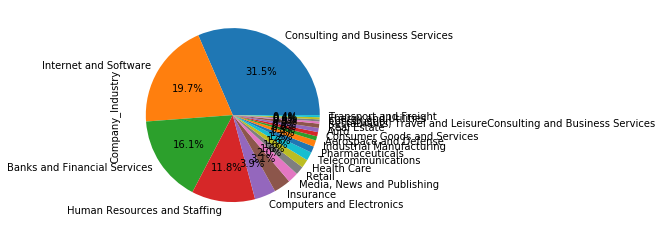

In [60]:
df_ind.plot(kind = 'pie', autopct = '%1.1f%%')

In [70]:
df_ind=df_ind.replace({"Insurance", "Other"})
df_ind

Consulting and Business Services                                   80
Internet and Software                                              50
Banks and Financial Services                                       41
Human Resources and Staffing                                       30
Computers and Electronics                                          10
Insurance                                                           8
Media, News and Publishing                                          5
Retail                                                              4
Health Care                                                         4
Telecommunications                                                  4
Pharmaceuticals                                                     3
Industrial Manufacturing                                            3
Aerospace and Defense                                               2
Consumer Goods and Services                                         2
Auto                

Consulting and Business Services                                   80
Internet and Software                                              50
Banks and Financial Services                                       41
Human Resources and Staffing                                       30
Computers and Electronics                                          10
Insurance                                                           8
Media, News and Publishing                                          5
Retail                                                              4
Health Care                                                         4
Telecommunications                                                  4
Pharmaceuticals                                                     3
Industrial Manufacturing                                            3
Aerospace and Defense                                               2
Consumer Goods and Services                                         2
Auto                

In [ ]:
# Salary_Index = df.iloc[:,4]
# No_of_Skills = df.iloc[:,7]
# correlation = st.pearsonr(Salary_Index,No_of_Skills)

In [ ]:
output_data_v1 = data.to_csv(r'../04._Output/output_data_v1.csv') 